<a href="https://colab.research.google.com/github/Baishnabi17/Customer-chun-prediction/blob/main/Stock_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install dependencies (only needed in Colab)
!pip install yfinance scikit-learn matplotlib --quiet

# Import libraries
import yfinance as yf  # Used to fetch stock data from Yahoo Finance.2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  #creating visualization
from sklearn.linear_model import LinearRegression



In [ ]:
# Download stock data
#stock = 'AAPL',GOOG,'TSLA'
stock='GOOG'
data = yf.download(stock, start='2020-01-01', end='2025-04-1')
data.reset_index(inplace=True)

[*********************100%***********************]  1 of 1 completed


In [ ]:
# Create a new column for number of days since start
data['Days'] = (data['Date'] - data['Date'].min()).dt.days

# Select features and target
X = data[['Days']]
y = data['Close']

In [ ]:
# Train Linear Regression model
model = LinearRegression()
model.fit(X, y)

# Predict for the next 30 days
future_days = pd.DataFrame({'Days': np.arange(data['Days'].max() + 1, data['Days'].max() + 31)})
future_preds = model.predict(future_days)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


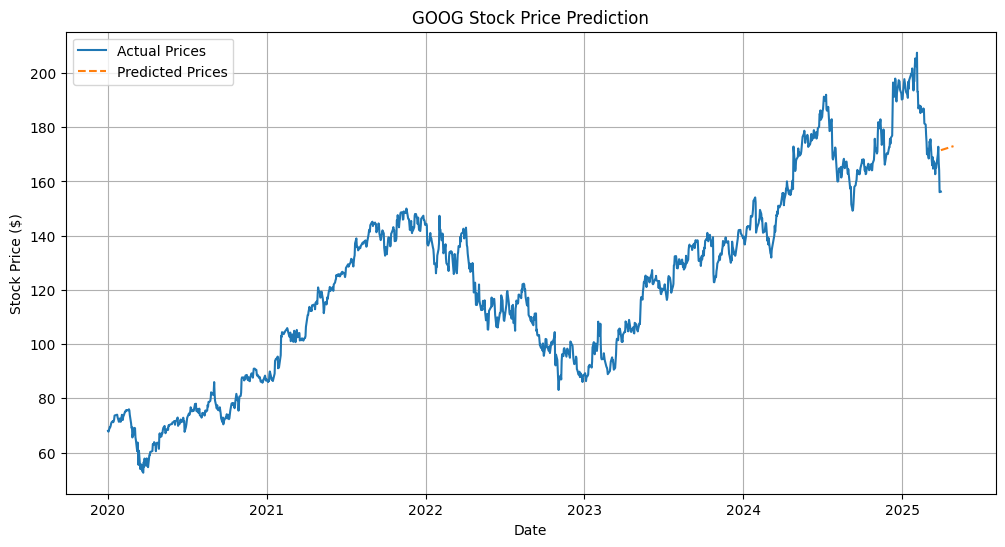

In [ ]:
# Plot historical and predicted prices
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], y, label='Actual Prices')
future_dates = pd.date_range(data['Date'].max(), periods=30)
plt.plot(future_dates, future_preds, label='Predicted Prices', linestyle='--')
plt.xlabel("Date")
plt.ylabel("Stock Price ($)")
plt.title(f"{stock} Stock Price Prediction")
plt.legend()
plt.grid(True)
plt.show()